In [1]:
# Machine Learning Model for 'Geld ausgegeben' prediction over other parameters of Einkaufsstatistik

# Importing the libraries

# Load numpy
import numpy as np

# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn library
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse

# render plots in jupyter notebook
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('Preprocessed_data.csv')

In [3]:
# Modelling

# X and y arrays
X = dataset[['KaeuferID', 'ProduktID', 'Geschlecht', 'Berufskategorie', 'Anzahl_Jahre_in_aktueller_Stadt', 'Familienstand', 'Produkt_Kategorie_1', 'Produkt_Kategorie_2', 'Produkt_Kategorie_3', '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', 'A', 'B']]
y = dataset['Geld_ausgegeben']

# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=1)

# Creating and Training the Model
elastic = ElasticNet(normalize=True)
search = GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X_train,y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [4]:
abs(search.best_score_)

21668212.228755727

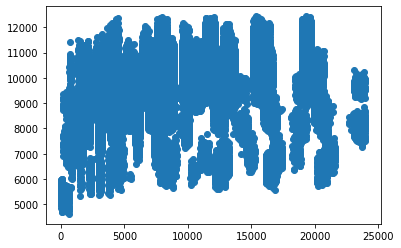

In [5]:
# Predictions from our Model
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train,y_train)
predictions = elastic.predict(X_test)
plt.scatter(y_test,predictions)

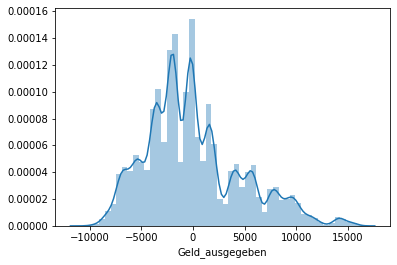

In [6]:
sns.distplot((y_test-predictions),bins=50);

In [7]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2_Score:', metrics.r2_score(y_test, predictions))

MAE: 3646.070957246387
MSE: 21843741.30328609
RMSE: 4673.728843577266
R2_Score: 0.13825390449335395
